In [1]:
import pandas as pd
import numpy as np
from collections import Counter

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
#for adding heavy chain
complementator = str.maketrans("ACGT", "TGCA") 

In [4]:
def get_norm_mutspec(df):
    
    normMut = pd.DataFrame()
    
    normMut[['A>C','A>G','A>T']] = df[['A>C','A>G','A>T']].div(df['A'], axis=0)
    normMut[['C>A','C>G','C>T']] = df[['C>A','C>G','C>T']].div(df['C'], axis=0)
    normMut[['G>A', 'G>C', 'G>T']] = df[['G>A', 'G>C', 'G>T']].div(df['G'], axis=0)
    normMut[['T>A', 'T>C', 'T>G']] = df[['T>A', 'T>C', 'T>G']].div(df['T'], axis=0)
    
    normMut = normMut.fillna(0)
    normMut = normMut.div(normMut.sum(axis=1), axis=0)
    
    normMut.columns = normMut.columns.str.translate(complementator)
    
    return normMut

In [14]:
def add_columns_to_norm_df(df, norm_df):
    norm_df.insert(0, 'G4_id', df['G4_id'])
    norm_df.insert(1, 'side', df['side'])
    norm_df.insert(2, 'number_of_win', df['number_of_win'])
    norm_df = norm_df.fillna(0)

    return norm_df

In [7]:
g4conf = pd.read_csv('../data/processed/mus_musculus/g4conf_mm10.csv')

df_win_mus_mut = pd.read_csv('../data/processed/mus_musculus/df_win_mus_mut.csv')
df_win_mus_mut_within_sides = pd.read_csv('../data/processed/mus_musculus/df_win_mus_mut_within_sides.csv')

In [20]:
normMutG4 = get_norm_mutspec(df_win_mus_mut)
normMutG4 = add_columns_to_norm_df(df_win_mus_mut, normMutG4)

In [18]:
normMutG4_within = get_norm_mutspec(df_win_mus_mut_within_sides)
normMutG4_within = add_columns_to_norm_df(df_win_mus_mut_within_sides, normMutG4_within)

In [22]:
#  length of G4
g4conf.width.median()/2

17.0

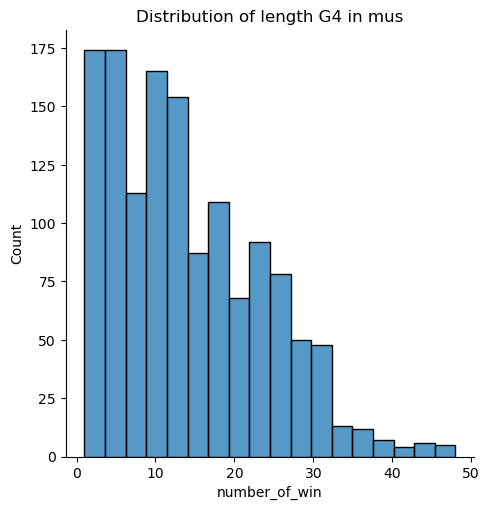

In [27]:
sns.displot(df_win_mus_mut_within_sides['number_of_win']).set(title='Distribution of length G4 in mus')

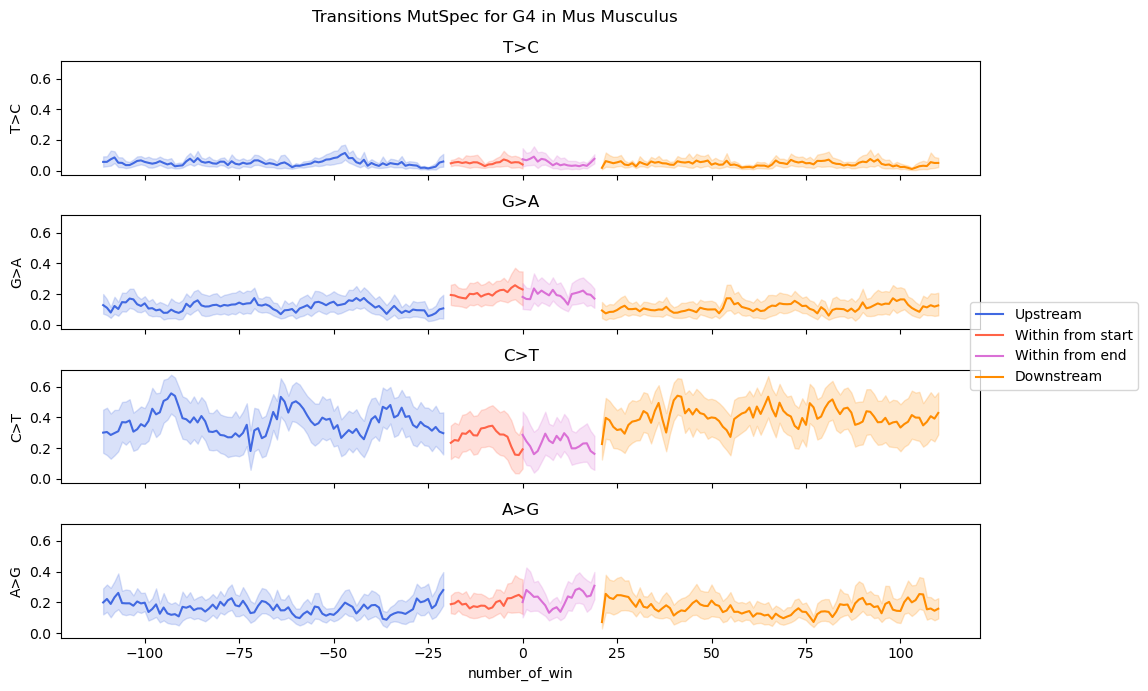

In [28]:
fig, axs = plt.subplots(4, sharex=True, sharey=True,  figsize=(10, 7))
mutations = ['T>C', 'G>A', 'C>T', 'A>G']

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']  # Specify colors for upstream and downstream plots

for i, mutation in enumerate(mutations):
    row = i % 4
    sns.lineplot(data=normMutG4[(normMutG4['side']=='up')], 
                 x=-normMutG4['number_of_win']-20, y=mutation, ax=axs[row], color=colors[0])
    sns.lineplot(data=normMutG4_within[(normMutG4_within['number_of_win'] <= 20) & 
                 (normMutG4_within['side']=='within_start')], 
                 x=normMutG4_within['number_of_win']-20, y=mutation, ax=axs[row], color=colors[2])
    sns.lineplot(data=normMutG4_within[(normMutG4_within['number_of_win'] <= 20) & 
                 (normMutG4_within['side']=='within_end')], 
                 x=-normMutG4_within['number_of_win']+20, y=mutation, ax=axs[row], color=colors[3])
    sns.lineplot(data=normMutG4[(normMutG4['side']=='down')], 
                 x=normMutG4['number_of_win']+20, y=mutation, ax=axs[row], color=colors[1]) \
                .set_title(mutation)
    
        
# Create custom legend handles and labels
handles = [plt.Line2D([], [], color=colors[0]), plt.Line2D([], [], color=colors[2]), 
           plt.Line2D([], [], color=colors[3]), plt.Line2D([], [], color=colors[1])]
labels = ['Upstream', 'Within from start', 'Within from end', 'Downstream']

# # Add legend with custom handles and labels
# plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15, 0.5))
plt.setp(axs, xticks=range(-100, 125, 25))
plt.suptitle('Transitions MutSpec for G4 in Mus Musculus')
plt.tight_layout()
plt.show()

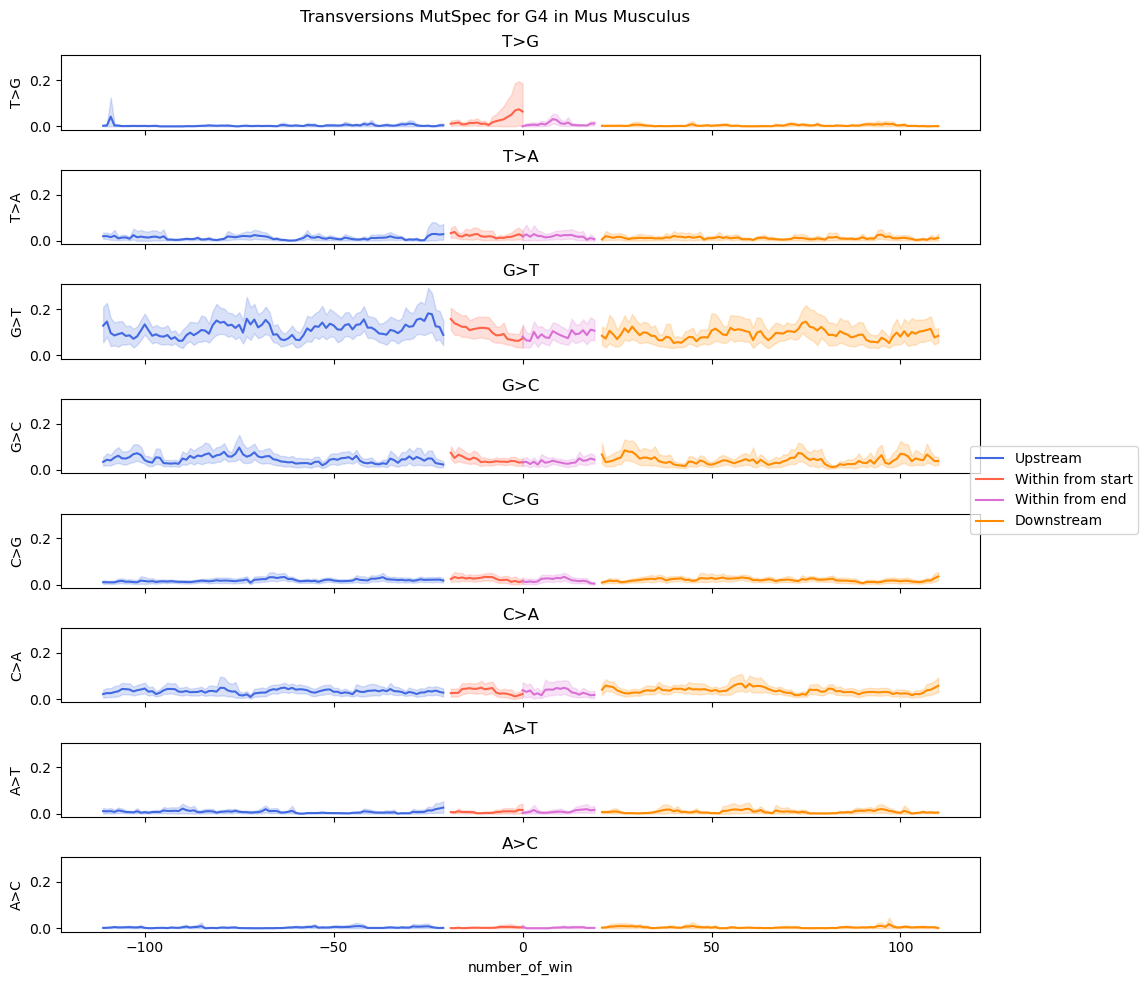

In [29]:
fig, axs = plt.subplots(8, sharex=True, sharey=True,  figsize=(10, 10))
mutations = ['T>G', 'T>A', 'G>T', 'G>C', 'C>G', 'C>A', 'A>T', 'A>C']

colors = ['royalblue', 'darkorange', 'tomato', 'orchid']  # Specify colors for upstream and downstream plots

for i, mutation in enumerate(mutations):
    row = i % 8
    sns.lineplot(data=normMutG4[(normMutG4['side']=='up')], 
                 x=-normMutG4['number_of_win']-20, y=mutation, ax=axs[row], color=colors[0])
    sns.lineplot(data=normMutG4_within[(normMutG4_within['number_of_win'] <= 20) & 
                 (normMutG4_within['side']=='within_start')], 
                 x=normMutG4_within['number_of_win']-20, y=mutation, ax=axs[row], color=colors[2])
    sns.lineplot(data=normMutG4_within[(normMutG4_within['number_of_win'] <= 20) & 
                 (normMutG4_within['side']=='within_end')], 
                 x=-normMutG4_within['number_of_win']+20, y=mutation, ax=axs[row], color=colors[3])
    sns.lineplot(data=normMutG4[(normMutG4['side']=='down')], 
                 x=normMutG4['number_of_win']+20, y=mutation, ax=axs[row], color=colors[1]) \
                .set_title(mutation)
    
        
# Create custom legend handles and labels
handles = [plt.Line2D([], [], color=colors[0]), plt.Line2D([], [], color=colors[2]), 
           plt.Line2D([], [], color=colors[3]), plt.Line2D([], [], color=colors[1])]
labels = ['Upstream', 'Within from start', 'Within from end', 'Downstream']

# # Add legend with custom handles and labels
# plt.legend(handles, labels, loc='center left', bbox_to_anchor=(1, 0.5))
fig.legend(handles, labels, loc='center right', bbox_to_anchor=(1.15, 0.5))
plt.suptitle('Transversions MutSpec for G4 in Mus Musculus')
plt.tight_layout()
plt.show()